In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import urllib.request, json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from data_functions import FreeCompetitions, FreeMatches, create_heatmap, draw_field, minutes_played
from urllib.request import urlopen
from pandas.io.json import json_normalize
from scipy.ndimage.filters import gaussian_filter

In [3]:
barcelona_deportivo = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/15946.json"
barcelona_manu = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3750201.json"

def load_match_events_df(url):
    response = urlopen(url)
    json_data = response.read().decode('utf-8', 'replace')
    d = json.loads(json_data)
    df = json_normalize(d)

    df = df[df['location'].notna()]
    df['location_x'] = df.apply(lambda row: row['location'][0], axis=1)
    df['location_y'] = df.apply(lambda row: row['location'][1], axis=1)
    return df 

df = load_match_events_df(barcelona_manu)
df

/home/blazej/anaconda3/envs/cs231n/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,shot.one_on_one,pass.no_touch,pass.miscommunication,dribble.no_touch,shot.aerial_won,injury_stoppage.in_chain,foul_committed.type.id,foul_committed.type.name,location_x,location_y
4,6dd66800-5339-44c3-b3dd-c6d4a4500eb1,5,1,00:00:00.515,0,0,2,0.169491,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,40.1
5,9f9b6191-3d4e-4622-ad3c-16def545de74,6,1,00:00:00.684,0,0,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.2,43.4
6,cbc9029b-d97e-4c90-b972-f84c7454a355,7,1,00:00:00.684,0,0,2,0.040000,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.2,43.4
7,519a021c-3966-4856-9659-a290c4279926,8,1,00:00:00.724,0,0,2,1.111525,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.3,41.1
8,ad4c7ad9-1e2a-4a33-9461-410247ac7f30,9,1,00:00:01.836,0,1,2,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.4,40.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,d382a2ff-3414-4bc1-be54-327b715d15da,3323,2,00:47:23.451,92,23,202,1.244964,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.7,80.0
3323,e836d3a9-df2d-48d1-a46a-66241ae77d68,3324,2,00:47:24.924,92,24,202,0.000000,22,Foul Committed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.9,6.0
3324,18b549d1-444a-4cb5-9d8e-376e76759cfc,3325,2,00:47:24.924,92,24,202,0.000000,21,Foul Won,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.2,74.1
3325,1d1d2579-c151-48a4-a7a7-c185129af967,3326,2,00:48:14.688,93,14,203,1.490881,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.6,72.1


In [4]:
# Unique types
df['type.name'].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Foul Committed',
       'Foul Won', 'Shot', 'Goal Keeper', 'Ball Recovery', 'Block',
       'Clearance', 'Dispossessed', 'Duel', 'Interception',
       'Dribbled Past', 'Dribble', 'Miscontrol', 'Referee Ball-Drop'],
      dtype=object)

In [5]:
def plot_events_heatmap(df, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    ax.set_title(title, loc='left')
    img, extent = create_heatmap(120 - df['location_x'], 80-  df['location_y'], 40)
    ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    draw_field(ax, heatmap=True)
    

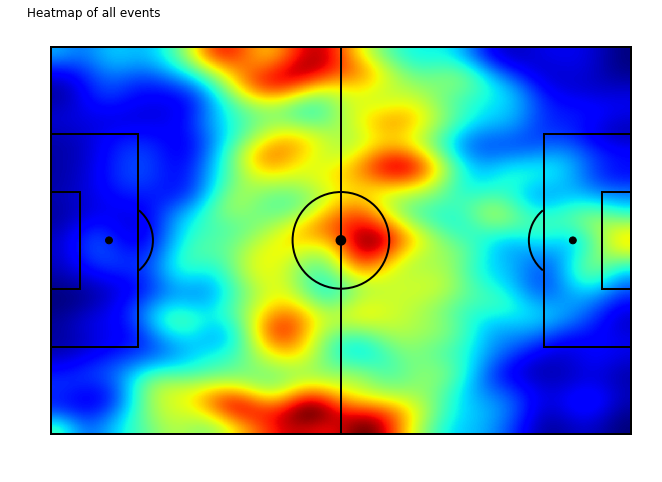

In [6]:
plot_events_heatmap(df, "Heatmap of all events")

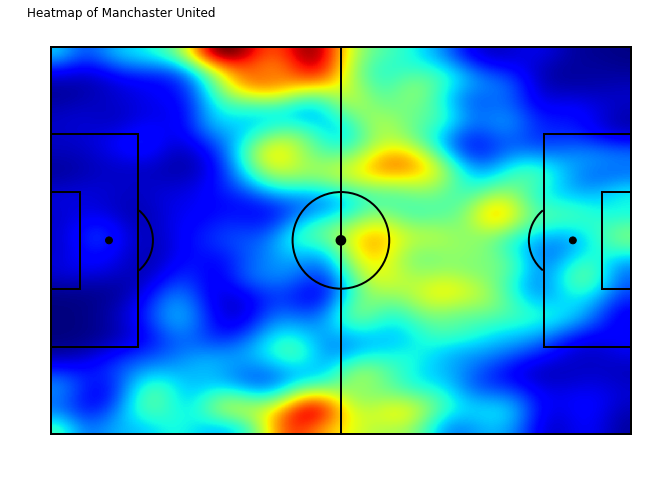

In [26]:
tmpdf = df[df['team.id'] == 39]
plot_events_heatmap(tmpdf, "Heatmap of Manchaster United")

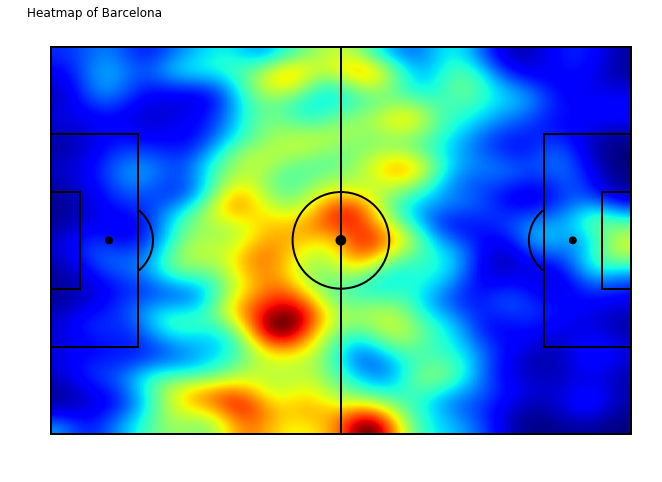

In [27]:
tmpdf = df[df['team.id'] == 217]
plot_events_heatmap(tmpdf, "Heatmap of Barcelona")

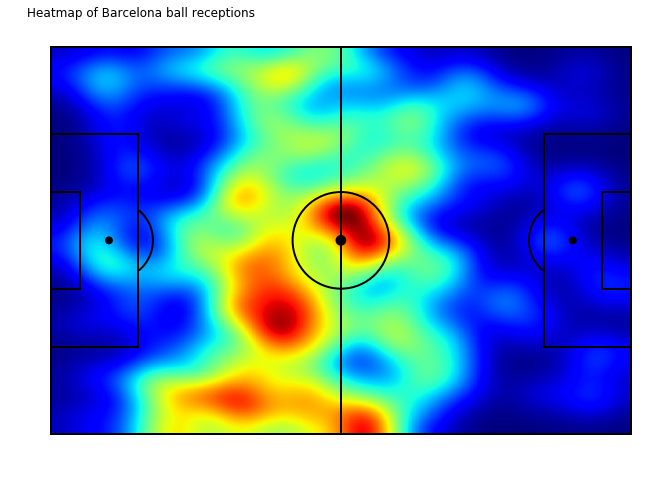

In [28]:
tmpdf = df[(df['team.id'] == 217) & (df['type.name'] == 'Ball Receipt*')].dropna(axis=1, how='all')
plot_events_heatmap(tmpdf, "Heatmap of Barcelona ball receptions")

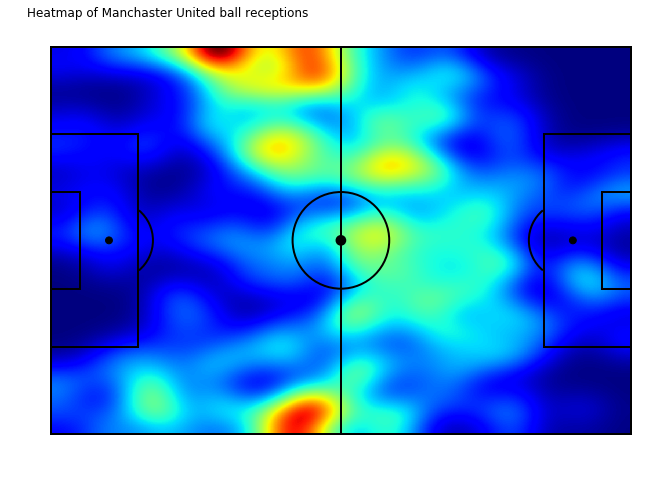

In [29]:
tmpdf = df[(df['team.id'] == 39) & (df['type.name'] == 'Ball Receipt*')].dropna(axis=1, how='all')
plot_events_heatmap(tmpdf, "Heatmap of Manchaster United ball receptions")

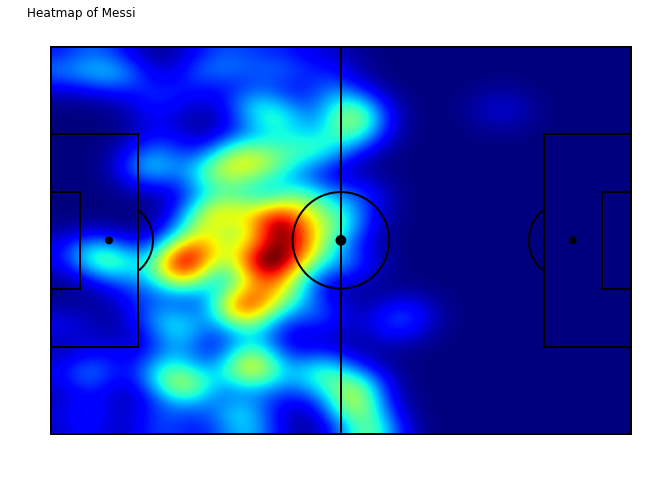

In [30]:
tmpdf = df[(df['team.id'] == 217) & (df['player.id'] == 5503)].dropna(axis=1, how='all')
plot_events_heatmap(tmpdf, "Heatmap of Messi")